# A summary of the OJO data

- [Load data](#load)
- [Metadata analysis](#metadata)
- [Skills analysis](#skills)

In [1]:
import os
from datetime import date

import pandas as pd
import numpy as np
import altair as alt

from ojd_daps_skills.utils.plotting import NESTA_COLOURS, nestafont, configure_plots
from ojd_daps_skills.utils.save_plotting import AltairSaver

from ojd_daps_skills.getters.data_getters import get_s3_resource, get_s3_data_paths, load_s3_json, load_s3_data, save_to_s3
from ojd_daps_skills import bucket_name
s3 = get_s3_resource()

In [2]:
s3_folder = "escoe_extension/outputs/data/model_application_data"

In [3]:
# Get todays date for the output name prefix
today = date.today().strftime("%d%m%Y")
today

'15112022'

If running in Jupyterlab, otherwise set to "default" - this means Altair output plots will be visible in github

In [4]:
alt.renderers.enable('mimetype') 

RendererRegistry.enable('mimetype')

## Loading data
<a id='load'></a>

In [6]:
# The job advert metadata 
file_name = os.path.join(s3_folder, 'dedupe_analysis_metadata.csv')
job_ad_data = load_s3_data(s3, bucket_name, file_name)

In [7]:
len(job_ad_data)

3693313

In [8]:
job_ad_data.head(2)

,job_id,end_date_chunk,job_location_raw,itl_1_code,itl_1_name,itl_2_code,itl_2_name,itl_3_code,itl_3_name,is_uk,...,parent_sector,knowledge_domain,occupation,num_exp,num_skills,num_uniq_skills,num_skill_level,num_uniq_skill_level,num_no_match,num_uniq_matched_skills
0,41547517,2021-01-22,"London, South East England",TLI,London,TLI,London,TLI,London,1.0,...,Financial Services,Financial Services,Finance Partner,2.0,18.0,15.0,7.0,6.0,0.0,15.0
1,41547520,2021-01-22,"Southampton, Hampshire",TLJ,South East (England),TLJ3,Hampshire and Isle of Wight,TLJ32,Southampton,1.0,...,Financial Services,Financial Services,Finance Partner,2.0,18.0,15.0,7.0,6.0,0.0,15.0


In [9]:
job_ad_data.iloc[0]

job_id                                       41547517
end_date_chunk                             2021-01-22
job_location_raw           London, South East England
itl_1_code                                        TLI
itl_1_name                                     London
itl_2_code                                        TLI
itl_2_name                                     London
itl_3_code                                        TLI
itl_3_name                                     London
is_uk                                             1.0
is_large_geo                                      0.0
location                   London, South East England
coordinates                                       NaN
type                          Recruitment consultancy
sector                       Other Financial Services
parent_sector                      Financial Services
knowledge_domain                   Financial Services
occupation                            Finance Partner
num_exp                     

In [10]:
# The skill sample
file_name = os.path.join(s3_folder, 'dedupe_analysis_skills_sample.json')
skill_sample = load_s3_data(s3, bucket_name, file_name)

In [11]:
len(skill_sample)

100000

In [12]:
print(skill_sample[0])

{'job_id': '41547789', 'end_date_chunk': '2021-01-22', 'job_location_raw': 'Oxfordshire, South East England', 'itl_1_code': 'TLJ', 'itl_1_name': 'South East (England)', 'itl_2_code': 'TLJ2', 'itl_2_name': 'Surrey, East and West Sussex', 'itl_3_code': 'TLJ25', 'itl_3_name': 'West Surrey', 'is_uk': 1.0, 'is_large_geo': 0.0, 'location': 'Oxfordshire, South East England', 'coordinates': '(51.31669998, -0.5)', 'type': 'Recruitment consultancy', 'sector': 'Other Construction &amp; Property', 'parent_sector': 'Construction &amp; Property', 'knowledge_domain': 'Financial Services', 'occupation': 'Facilities Manager', 'num_exp': 0.0, 'num_skills': 32.0, 'num_uniq_skills': 27.0, 'num_skill_level': 20.0, 'num_uniq_skill_level': 17.0, 'num_no_match': 1.0, 'num_uniq_matched_skills': 26.0, 'SKILL': [['build relationships', ['building business relationships', 'dc72ad0a-c5dc-4abd-bc0d-ca43e82162e1']], ['managing a team', ['managing a team', 'cb668e89-6ef5-4ff3-ab4a-506010e7e70b']], ['of goods and serv

## Metadata analysis
<a id='metadata'></a>
- Number of jobs over time
- Common locations
- Common occupations

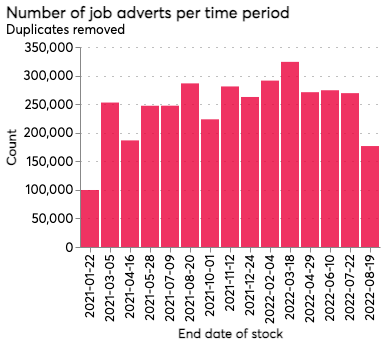

In [13]:
ads_per_date_chunked = job_ad_data['end_date_chunk'].value_counts()
ads_per_date_chunked = pd.DataFrame(ads_per_date_chunked).reset_index().rename(
    columns={'index': 'date', 'end_date_chunk': 'count'})

chart_title = 'Number of job adverts per time period'
chart_subtitle = 'Duplicates removed'

chart = alt.Chart(ads_per_date_chunked).mark_bar().encode(
    alt.X('date', title='End date of stock'),
    alt.Y('count', title='Count'),
    tooltip=['count']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_num_job_adverts_chunked")
chart

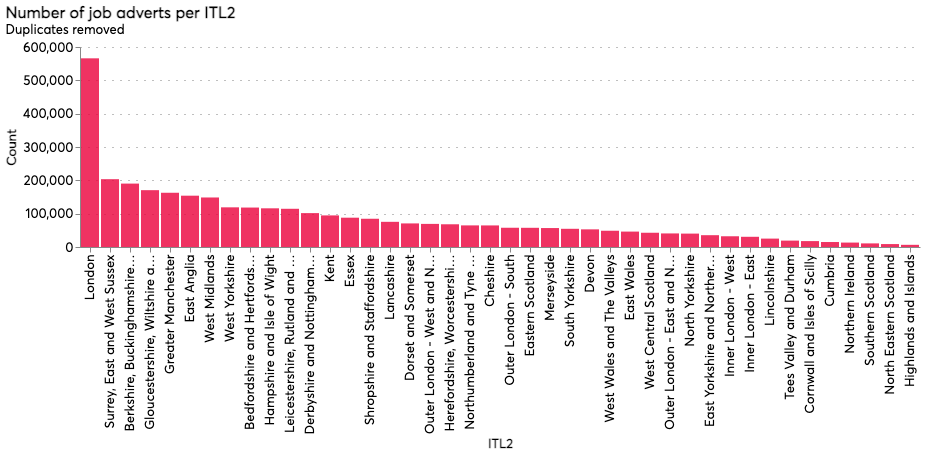

In [14]:
chart_title = 'Number of job adverts per ITL2'
chart_subtitle = 'Duplicates removed'

ads_per_sector_chunked = job_ad_data['itl_2_name'].value_counts()
ads_per_sector_chunked = pd.DataFrame(ads_per_sector_chunked).reset_index().rename(
    columns={'index': 'itl_2_name', 'itl_2_name': 'count'})

chart = alt.Chart(ads_per_sector_chunked).mark_bar().encode(
    alt.X('itl_2_name', title='ITL2', sort=None),
    alt.Y('count', title='Count'),
    tooltip=['count']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_num_job_ads_by_itl2")
chart

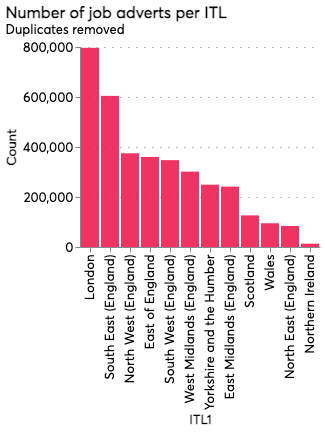

In [15]:
chart_title = 'Number of job adverts per ITL'
chart_subtitle = 'Duplicates removed'

ads_per_sector_chunked = job_ad_data['itl_1_name'].value_counts()
ads_per_sector_chunked = pd.DataFrame(ads_per_sector_chunked).reset_index().rename(
    columns={'index': 'itl_1_name', 'itl_1_name': 'count'})

chart = alt.Chart(ads_per_sector_chunked).mark_bar().encode(
    alt.X('itl_1_name', title='ITL1', sort=None),
    alt.Y('count', title='Count'),
    tooltip=['count']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_num_job_ads_by_itl1")
chart

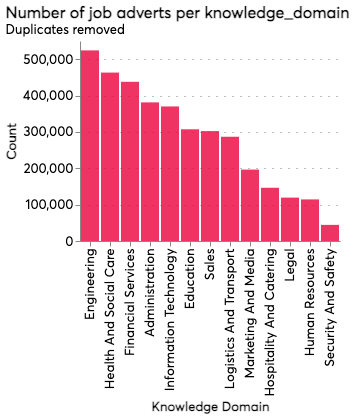

In [16]:
chart_title = 'Number of job adverts per knowledge_domain'
chart_subtitle = 'Duplicates removed'

ads_per_sector_chunked = job_ad_data['knowledge_domain'].value_counts()
ads_per_sector_chunked = pd.DataFrame(ads_per_sector_chunked).reset_index().rename(
    columns={'index': 'knowledge_domain', 'knowledge_domain': 'count'})

chart = alt.Chart(ads_per_sector_chunked).mark_bar().encode(
    alt.X('knowledge_domain', title='Knowledge Domain', sort=None),
    alt.Y('count', title='Count'),
    tooltip=['count']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_num_job_ads_by_knowledge_domain")
chart

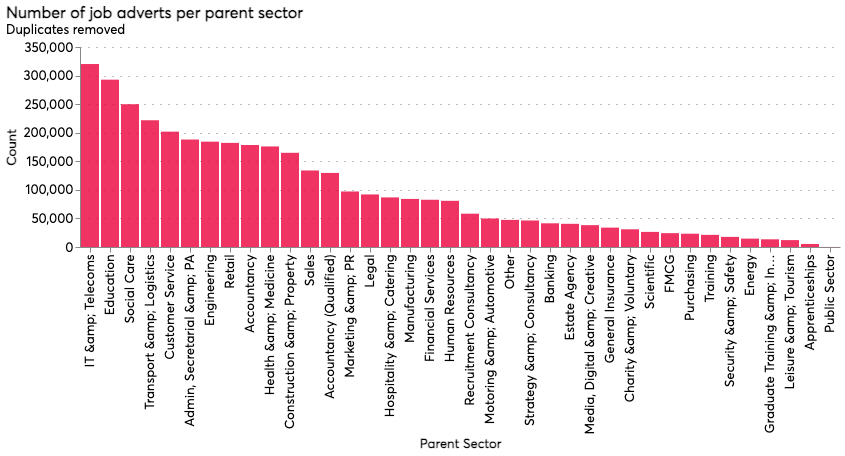

In [17]:
chart_title = 'Number of job adverts per parent sector'
chart_subtitle = 'Duplicates removed'

ads_per_sector_chunked = job_ad_data['parent_sector'].value_counts()
ads_per_sector_chunked = pd.DataFrame(ads_per_sector_chunked).reset_index().rename(
    columns={'index': 'parent_sector', 'parent_sector': 'count'})

chart = alt.Chart(ads_per_sector_chunked).mark_bar().encode(
    alt.X('parent_sector', title='Parent Sector', sort=None),
    alt.Y('count', title='Count'),
    tooltip=['count']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_num_job_ads_by_parent_sector")
chart

In [18]:
print(f"There are {job_ad_data['itl_1_name'].nunique()} ITL 1 locations")
print(f"There are {job_ad_data['itl_2_name'].nunique()} ITL 2 locations")
print(f"There are {job_ad_data['itl_3_name'].nunique()} ITL 3 locations")
print(f"{round(sum(pd.isnull(job_ad_data['itl_1_name']))*100/len(job_ad_data),2)}% of locations don't have a ITL 1 location")
print(f"{round(sum(pd.isnull(job_ad_data['itl_2_name']))*100/len(job_ad_data),2)}% of locations don't have a ITL 2 location")
print(f"{round(sum(pd.isnull(job_ad_data['itl_3_name']))*100/len(job_ad_data),2)}% of locations don't have a ITL 3 location")
print(f"{round(sum(pd.isnull(job_ad_data['itl_1_code']))*100/len(job_ad_data),2)}% of locations don't have a ITL 1 code")
print(f"{round(sum(pd.isnull(job_ad_data['itl_2_code']))*100/len(job_ad_data),2)}% of locations don't have a ITL 2 code")
print(f"{round(sum(pd.isnull(job_ad_data['itl_3_code']))*100/len(job_ad_data),2)}% of locations don't have a ITL 3 code")

There are 12 ITL 1 locations
There are 42 ITL 2 locations
There are 180 ITL 3 locations
2.67% of locations don't have a ITL 1 location
3.63% of locations don't have a ITL 2 location
3.63% of locations don't have a ITL 3 location
2.67% of locations don't have a ITL 1 code
3.63% of locations don't have a ITL 2 code
3.63% of locations don't have a ITL 3 code


In [19]:
print(f"There are {job_ad_data['sector'].nunique()} sectors")
print(f"There are {job_ad_data['parent_sector'].nunique()} parent sectors")
print(f"There are {job_ad_data['knowledge_domain'].nunique()} knowledge domains")
print(f"There are {job_ad_data['occupation'].nunique()} occupations")

print(f"{round(sum(pd.isnull(job_ad_data['sector']))*100/len(job_ad_data),2)}% of the data don't have a sector")
print(f"{round(sum(pd.isnull(job_ad_data['parent_sector']))*100/len(job_ad_data),2)}% of the data don't have a parent_sector")
print(f"{round(sum(pd.isnull(job_ad_data['knowledge_domain']))*100/len(job_ad_data),2)}% of the data don't have a knowledge_domain")
print(f"{round(sum(pd.isnull(job_ad_data['occupation']))*100/len(job_ad_data),2)}% of the data don't have an occupation")

There are 791 sectors
There are 38 parent sectors
There are 13 knowledge domains
There are 6060 occupations
0.0% of the data don't have a sector
0.0% of the data don't have a parent_sector
0.0% of the data don't have a knowledge_domain
23.25% of the data don't have an occupation


## Skills analysis
<a id='skills'></a>
- Average number of skills
- Average number of experience
- % without skills
- How big of an issue is duplication?

In [20]:
job_ad_data['num_matched'] = job_ad_data['num_skills'] - job_ad_data['num_no_match']
job_ad_data['num_matched_skill_group'] = job_ad_data['num_matched'] - job_ad_data['num_skill_level']
job_ad_data['num_unique_matched_skill_group'] = job_ad_data['num_uniq_matched_skills'] - job_ad_data['num_uniq_skill_level']

In [21]:
print(f"There are {len(job_ad_data)} job adverts")

print("Extracting")

print(f"The mean number of extracted experiences per job advert is {round(job_ad_data['num_exp'].mean(), 2)}")
print(f"The mean number of extracted skills per job advert is {round(job_ad_data['num_skills'].mean(), 2)}")
print(f"{round(sum(job_ad_data['num_skills']==0)*100/len(job_ad_data), 2)}% job adverts have no skills extracted")
print(f"{round(sum(job_ad_data['num_exp']==0)*100/len(job_ad_data), 2)}% job adverts have no experiences extracted")
print(f"The mean number of unique extracted skills per job advert is {round(job_ad_data['num_uniq_skills'].mean(), 2)}")

print("Matching")

print(f"The mean number of matched extracted skills per job advert is {round(job_ad_data['num_matched'].mean(), 2)}")
print(f"The mean number of unique matched extracted skills per job advert is {round(job_ad_data['num_uniq_matched_skills'].mean(), 2)}")
print(f"The mean number of not matched extracted skills per job advert is {round(job_ad_data['num_no_match'].mean(), 2)}")
print(f"The mean number of extracted skills matched to the ESCO skill level per job advert is {round(job_ad_data['num_skill_level'].mean(), 2)}")
print(f"The mean number of unique extracted skills matched to the ESCO skill level per job advert is {round(job_ad_data['num_uniq_skill_level'].mean(), 2)}")
print(f"The mean number of extracted skills matched to the ESCO skill group levels 3 or 2 per job advert is {round(job_ad_data['num_matched_skill_group'].mean(), 2)}")
print(f"The mean number of unique extracted skills matched to the ESCO skill group levels 3 or 2 per job advert is {round(job_ad_data['num_unique_matched_skill_group'].mean(), 2)}")

There are 3693313 job adverts
Extracting
The mean number of extracted experiences per job advert is 0.79
The mean number of extracted skills per job advert is 11.12
3.57% job adverts have no skills extracted
47.54% job adverts have no experiences extracted
The mean number of unique extracted skills per job advert is 10.4
Matching
The mean number of matched extracted skills per job advert is 10.79
The mean number of unique matched extracted skills per job advert is 10.09
The mean number of not matched extracted skills per job advert is 0.33
The mean number of extracted skills matched to the ESCO skill level per job advert is 5.61
The mean number of unique extracted skills matched to the ESCO skill level per job advert is 5.34
The mean number of extracted skills matched to the ESCO skill group levels 3 or 2 per job advert is 5.18
The mean number of unique extracted skills matched to the ESCO skill group levels 3 or 2 per job advert is 4.76


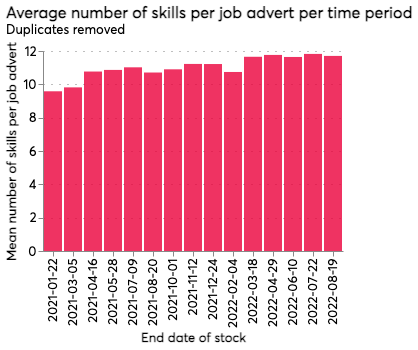

In [22]:
meanskills_per_date_chunked = job_ad_data.groupby('end_date_chunk')['num_skills'].mean()
meanskills_per_date_chunked = pd.DataFrame(meanskills_per_date_chunked).reset_index().rename(
    columns={'num_skills': 'mean_num_skills', 'end_date_chunk': 'date'})

chart_title = 'Average number of skills per job advert per time period'
chart_subtitle = 'Duplicates removed'

chart = alt.Chart(meanskills_per_date_chunked).mark_bar().encode(
    alt.X('date', title='End date of stock'),
    alt.Y('mean_num_skills', title='Mean number of skills per job advert'),
    tooltip=['mean_num_skills']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_mean_num_skills_by_date")
chart

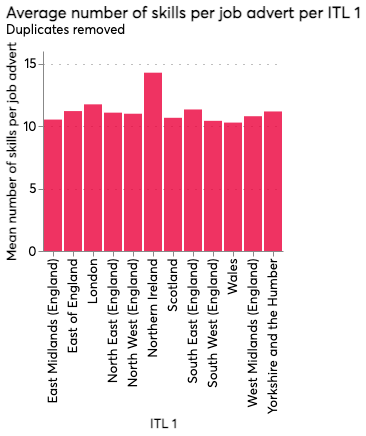

In [23]:
meanskills_per_date_chunked = job_ad_data.groupby('itl_1_name')['num_skills'].mean()
meanskills_per_date_chunked = pd.DataFrame(meanskills_per_date_chunked).reset_index().rename(
    columns={'num_skills': 'mean_num_skills', 'itl_1_name': 'itl_1'})

chart_title = 'Average number of skills per job advert per ITL 1'
chart_subtitle = 'Duplicates removed'

chart = alt.Chart(meanskills_per_date_chunked).mark_bar().encode(
    alt.X('itl_1', title='ITL 1'),
    alt.Y('mean_num_skills', title='Mean number of skills per job advert'),
    tooltip=['mean_num_skills']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_mean_num_skills_by_itl1")
chart

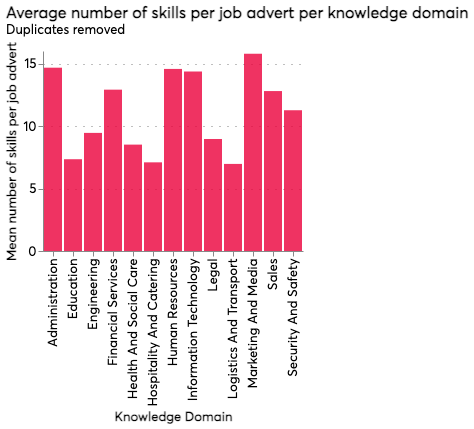

In [24]:
meanskills_per_date_chunked = job_ad_data.groupby('knowledge_domain')['num_skills'].mean()
meanskills_per_date_chunked = pd.DataFrame(meanskills_per_date_chunked).reset_index().rename(
    columns={'num_skills': 'mean_num_skills', 'knowledge_domain': 'knowledge_domain'})

chart_title = 'Average number of skills per job advert per knowledge domain'
chart_subtitle = 'Duplicates removed'

chart = alt.Chart(meanskills_per_date_chunked).mark_bar().encode(
    alt.X('knowledge_domain', title='Knowledge Domain'),
    alt.Y('mean_num_skills', title='Mean number of skills per job advert'),
    tooltip=['mean_num_skills']
).configure_mark(
    opacity=0.8,
    color=NESTA_COLOURS[4]
)
chart = configure_plots(chart, chart_title=chart_title, chart_subtitle=chart_subtitle)
# AltairSaver().save(chart, f"{today}_mean_num_skills_by_knowledge_domain")
chart